## 1.绘图功能初览

In [5]:
pip install flownetwork

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib


     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB 81.9 kB/s eta 0:01:33
     ---------------------------------------- 0.0/7.6 MB 81.9 kB/s eta 0:01:33
     ---------------------------------------- 0.0/7.6 MB 81.9 kB/s eta 0:01:33
     ---------------------------------------- 0.1/7.6 MB 136.5 kB/s eta 0:00:56
     ---------------------------------------- 0.1/7.6 MB 136.5 kB/s eta 0:00:56
     ---------------------------------------- 0.1/7.6 MB 135.6 kB/s eta 0:00:56
     --------------------

In [10]:
pip install networkx


  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)


In [18]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [14]:
from flownetwork import flownetwork as fn
import networkx as nx
import pylab as plt
import numpy as np

print(fn.__version__)

$version = py3.0.1$


In [15]:
help(fn.constructFlowNetwork)

Help on function constructFlowNetwork in module flownetwork.flownetwork:

constructFlowNetwork(C)
    C is an array of two dimentions, e.g., 
    C = np.array([[user1, item1], 
                  [user1, item2], 
                  [user2, item1], 
                  [user2, item3]])
    Return a balanced flow network



In [16]:
# constructing a flow network
demo = fn.attention_data
gd = fn.constructFlowNetwork(demo)

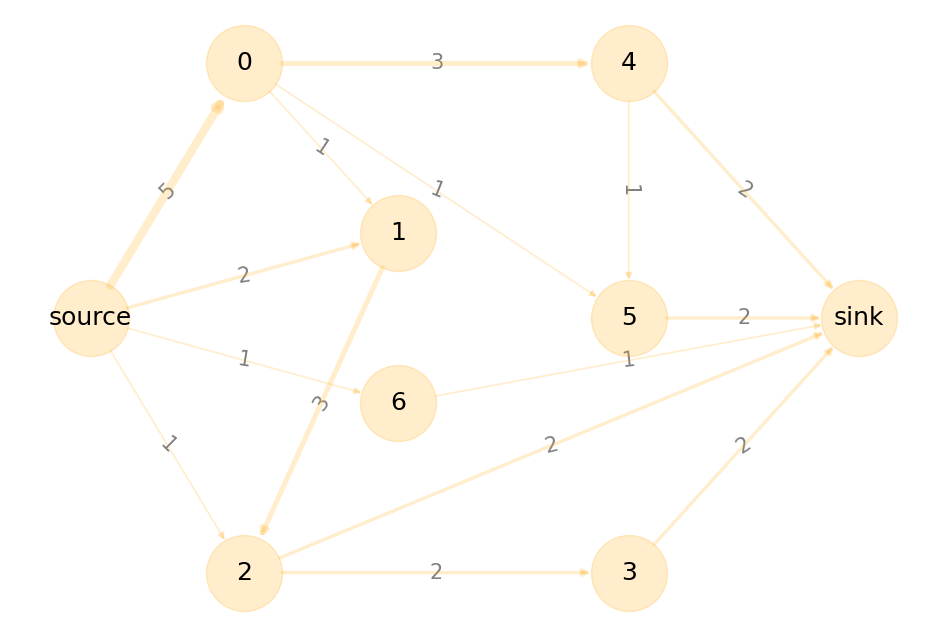

In [17]:
# drawing a demo network
fig = plt.figure(figsize=(12, 8),facecolor='white')
pos={0: np.array([ 0.2 ,  0.8]),
 2: np.array([ 0.2,  0.2]),
 1: np.array([ 0.4,  0.6]),
 6: np.array([ 0.4,  0.4]),
 4: np.array([ 0.7,  0.8]),
 5: np.array([ 0.7,  0.5]),
 3: np.array([ 0.7,  0.2 ]),
 'sink': np.array([ 1,  0.5]),
 'source': np.array([ 0,  0.5])}

width=[float(d['weight']*1.2) for (u,v,d) in gd.edges(data=True)]
edge_labels=dict([((u,v,),d['weight']) for u,v,d in gd.edges(data=True)])

nx.draw_networkx_edge_labels(gd,pos,edge_labels=edge_labels, font_size = 15, alpha = .5)
nx.draw(gd, pos, node_size = 3000, node_color = 'orange',
        alpha = 0.2, width = width, edge_color='orange',style='solid')
nx.draw_networkx_labels(gd,pos,font_size=18)
plt.show()

In [20]:
pip install networkx==2.0

Note: you may need to restart the kernel to use updated packages.


### 此处为何会报错呢？而【26】的fn.networkDissipate(gd)则正常运行？
### 应该是network版本的问题，新版移除了部分属性和方法，可以使用pip install networkx==2.0进行降级

In [30]:
nx.info(gd)

Number of nodes 9


In [25]:
# flow matrix
m = fn.getFlowMatrix(gd)
m

AttributeError: module 'networkx' has no attribute 'to_numpy_matrix'

In [26]:
fn.networkDissipate(gd)

defaultdict(<function flownetwork.flownetwork.networkDissipate.<locals>.<lambda>()>,
            {0: [0, 5, 5],
             1: [0, 3, 2],
             2: [2, 4, 1],
             6: [1, 1, 1],
             3: [2, 2, 0],
             4: [2, 3, 0],
             5: [2, 2, 0]})

In [27]:
# 查看属性
type(gd)
dir(gd)

networkx.classes.digraph.DiGraph

## 2.文件读写

In [31]:
pip install iching

     ---------------------------------------- 0.0/468.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/468.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/468.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/468.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/468.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/468.5 kB ? eta -:--:--
     -- ------------------------------------- 30.7/468.5 kB ? eta -:--:--
     -- ------------------------------------- 30.7/468.5 kB ? eta -:--:--
     -- ------------------------------------- 30.7/468.5 kB ? eta -:--:--
     --- --------------------------------- 41.0/468.5 kB 279.3 kB/s eta 0:00:02
     --- --------------------------------- 41.0/468.5 kB 279.3 kB/s eta 0:00:02
     ---- -------------------------------- 61.4/468.5 kB 252.2 kB/s eta 0:00:02
     ---- -------------------------------- 61.4/468.5 kB 252.2 kB/s eta 0:00:02
     ---- ----------

In [32]:
import random, datetime
import numpy as np
import pylab as plt
import matplotlib
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats.stats import pearsonr
#!pip install iching

C:\Users\零落\AppData\Local\Temp\ipykernel_25292\1294504575.py:7: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [37]:
with open('song.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

In [38]:
len(lines)

68

In [39]:
type(lines)

list

In [41]:
lines[22:48]

['Alanlaye\n',
 'Sitting by myself\n',
 'I opened the box\n',
 'So simple, so special\n',
 'The salt, salt\n',
 'From my eyes, they dropped\n',
 'You might also like\n',
 'Rightfully\n',
 'Mili \n',
 'Cupid (Twin Version)\n',
 'FIFTY FIFTY \n',
 'You’re Losing Me \n',
 'Taylor Swift\n',
 'Post-Chorus\n',
 'Always\n',
 'You never fail to drain my tears\n',
 'And bring my face to smile\n',
 '\n',
 '\n',
 'Old frozеn rice\n',
 'Chopped kimchi, green onions\n',
 'Heatеd sesame oil\n',
 'The smell of happiness\n',
 'Stir fry in a wok\n',
 'Sizzle, sizzle, pi-li-li\n',
 'Lu-lu-lu\n']

## 3.数据类型

In [42]:
# str, int, float, bool
type(True)

bool

In [43]:
"IZAKKU"

'IZAKKU'

In [44]:
# int
int('5') 

5

In [45]:
# float
float(str(7.1))
#str(7.1)

7.1

In [46]:
range(10) 

range(0, 10)

In [47]:
for i in range(1,10):
    print(i)
# range(1, 10)

1
2
3
4
5
6
7
8
9


## 4.了解对象详细信息

In [49]:
dir(str)[-10:]

['rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [50]:
help(str)

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Return a formatted version of the string as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  

In [51]:
'cheng jun'.__add__(' is a big fan of Socrates!')

'cheng jun is a big fan of Socrates!'

In [52]:
'   '.isspace()

True

In [53]:
'socrates the king'.__add__(' is the greatest.')

'socrates the king is the greatest.'

In [55]:
x = ' Hello WorlD  '
dir(x)[-10:] 

['rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

## 5.matplotlib绘图

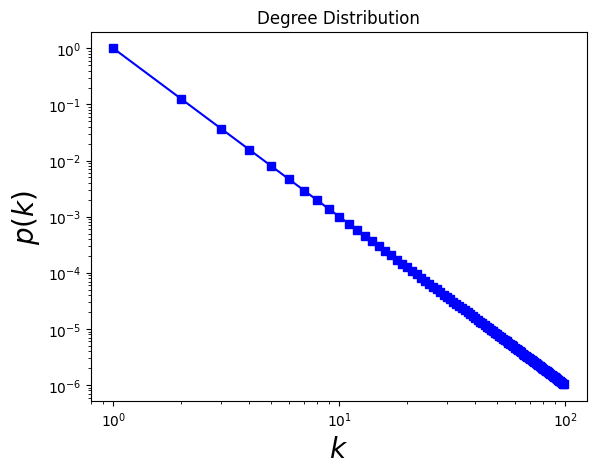

In [56]:
#
%matplotlib inline
import matplotlib.pyplot as plt
x = range(1, 100)
y = [i**-3 for i in x]
plt.plot(x, y, 'b-s')
plt.ylabel('$p(k)$', fontsize = 20)
plt.xlabel('$k$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.title('Degree Distribution')
plt.show()

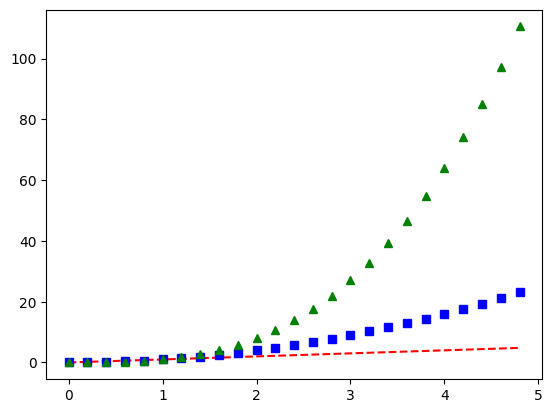

In [57]:
import numpy as np
# red dashes, blue squares and green triangles
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

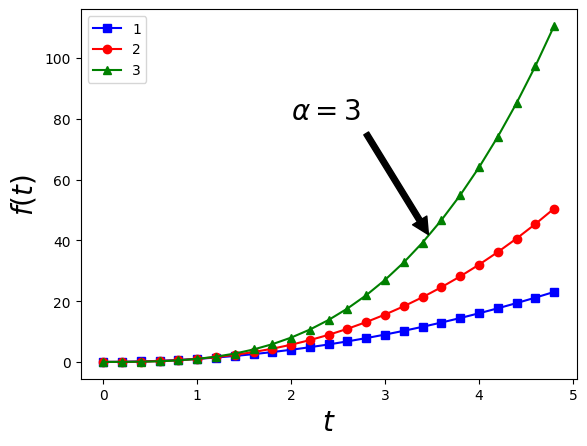

In [58]:
# red dashes, blue squares and green triangles
t = np.arange(0., 5., 0.2)
plt.plot(t, t**2, 'b-s', label = '1')
plt.plot(t, t**2.5, 'r-o', label = '2')
plt.plot(t, t**3, 'g-^', label = '3')
plt.annotate(r'$\alpha = 3$', xy=(3.5, 40), xytext=(2, 80),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize = 20)
plt.ylabel('$f(t)$', fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.legend(loc=2,numpoints=1,fontsize=10)
plt.show()
# plt.savefig('/Users/chengjun/GitHub/cjc/figure/save_figure.png',
#             dpi = 300, bbox_inches="tight",transparent = True)

In [61]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")

<Figure size 500x500 with 0 Axes>

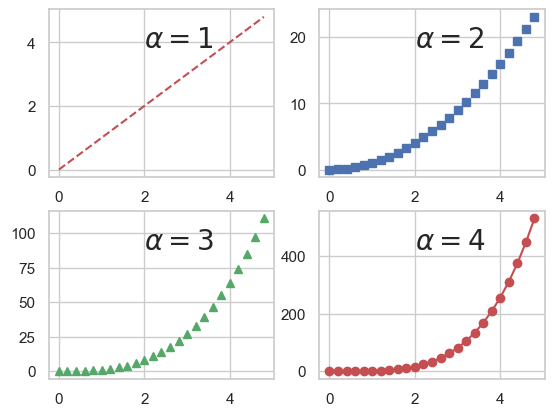

In [63]:
plt.figure(1)
plt.subplot(221)
plt.plot(t, t, 'r--')
plt.text(2, 0.8*np.max(t), r'$\alpha = 1$', fontsize = 20)
plt.subplot(222)
plt.plot(t, t**2, 'bs')
plt.text(2, 0.8*np.max(t**2), r'$\alpha = 2$', fontsize = 20)
plt.subplot(223)
plt.plot(t, t**3, 'g^')
plt.text(2, 0.8*np.max(t**3), r'$\alpha = 3$', fontsize = 20)
plt.subplot(224)
plt.plot(t, t**4, 'r-o')
plt.text(2, 0.8*np.max(t**4), r'$\alpha = 4$', fontsize = 20)
plt.show()

In [64]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

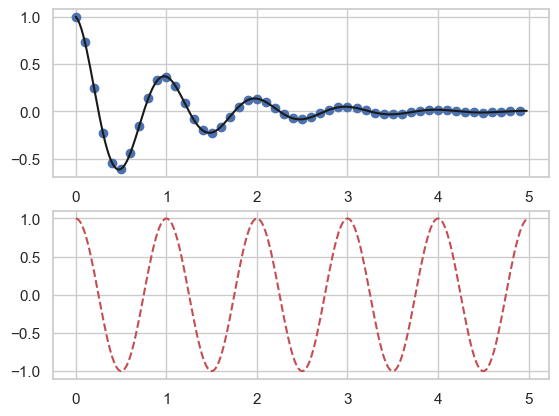

In [65]:
plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo')
plt.plot(t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

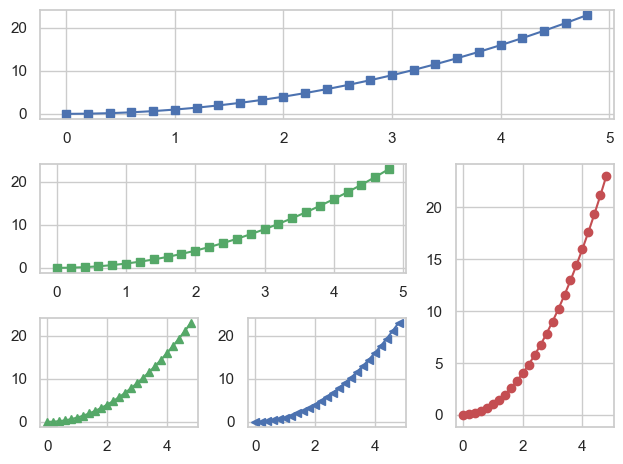

In [66]:
import matplotlib.gridspec as gridspec
import numpy as np

t = np.arange(0., 5., 0.2)

gs = gridspec.GridSpec(3, 3)
ax1 = plt.subplot(gs[0, :])
plt.plot(t, t**2, 'b-s')
ax2 = plt.subplot(gs[1,:-1])
plt.plot(t, t**2, 'g-s')
ax3 = plt.subplot(gs[1:, -1])
plt.plot(t, t**2, 'r-o')
ax4 = plt.subplot(gs[-1,0])
plt.plot(t, t**2, 'g-^')
ax5 = plt.subplot(gs[-1,1])
plt.plot(t, t**2, 'b-<')
plt.tight_layout()

In [67]:
def OLSRegressPlot(x,y,col,xlab,ylab):
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant, beta = res.params
    r2 = res.rsquared
    lab = r'$\beta = %.2f, \,R^2 = %.2f$' %(beta,r2)
    plt.scatter(x,y,s=60,facecolors='none', edgecolors=col)
    plt.plot(x,constant + x*beta,"red",label=lab)
    plt.legend(loc = 'upper left',fontsize=16)
    plt.xlabel(xlab,fontsize=26)
    plt.ylabel(ylab,fontsize=26)

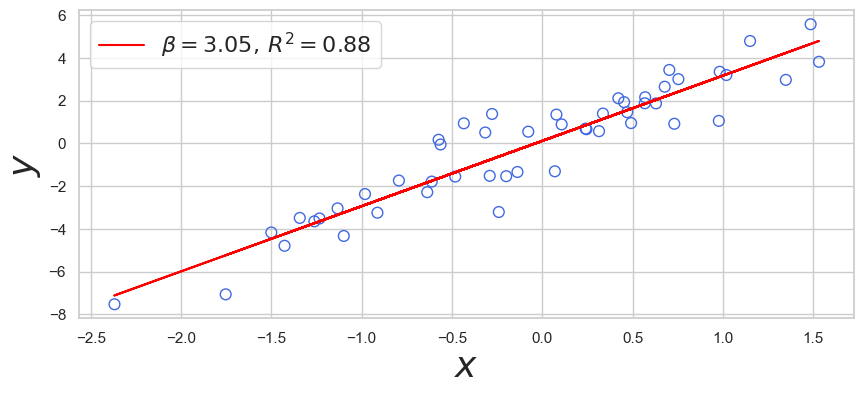

In [68]:
x = np.random.randn(50)
y = np.random.randn(50) + 3*x
pearsonr(x, y)
fig = plt.figure(figsize=(10, 4),facecolor='white')
OLSRegressPlot(x,y,'RoyalBlue',r'$x$',r'$y$')
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

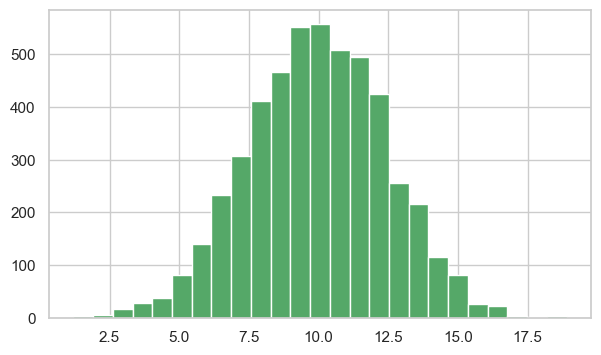

In [69]:
fig = plt.figure(figsize=(7, 4),facecolor='white')
data = norm.rvs(10.0, 2.5, size=5000)
mu, std = norm.fit(data)
plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
title = r"$\mu = %.2f, \,  \sigma = %.2f$" % (mu, std)
plt.title(title,size=16)
plt.show()